### Import library

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

### Import data

In [2]:
files = [file for file in os.listdir('./Sales_data')]
df = pd.DataFrame()
for file in files:
    a = pd.read_csv('./Sales_data/'+file)
    df = pd.concat([df, a])
    
df.to_csv('df.csv', index = False)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# What was the best month for sales? How much was earned that month?

### Drop NaN values, add Sales column

In [4]:
df = df.dropna()
df = df[df['Order ID'] != 'Order ID']

df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month'] = df['Order Date'].dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4


In [5]:
salesbymonth = df.groupby('Month').sum()
salesbymonth

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


### Add a chart

In [ ]:
months = [Month for Month, salesbymonth in df.groupby('Month')]

plt.bar(months, salesbymonth['Sales'])
plt.xticks(months)
plt.show()

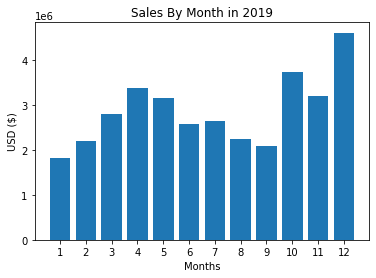

In [24]:
months = [Month for Month, salesbymonth in df.groupby('Month')]

plt.bar(months, salesbymonth['Sales'])
plt.title('Sales By Month in 2019')
plt.xlabel('Months')
plt.xticks(months)
plt.ylabel('USD ($)')
plt.show()

# What city sold the most product?

In [7]:
def getcity(add):
    return add.split(',')[1]
def getstate(add):
    return add.split(',')[2].split(' ')[1]
    
df['Cities'] = df['Purchase Address'].apply(lambda x: f"{getcity(x)} ({getstate(x)})")
df.head()    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Cities
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


In [8]:
salesbycity = df.groupby('Cities').sum()
salesbycity

,Quantity Ordered,Price Each,Sales,Month
Cities,,,,
Atlanta (GA),16602,2.779908e+06,2.795499e+06,104794
Austin (TX),11153,1.809874e+06,1.819582e+06,69829
Boston (MA),22528,3.637410e+06,3.661642e+06,141112
Dallas (TX),16730,2.752628e+06,2.767975e+06,104620
Los Angeles (CA),33289,5.421435e+06,5.452571e+06,208325
New York City (NY),27932,4.635371e+06,4.664317e+06,175741
Portland (ME),2750,4.471893e+05,4.497583e+05,17144
Portland (OR),11303,1.860558e+06,1.870732e+06,70621
San Francisco (CA),50239,8.211462e+06,8.262204e+06,315520


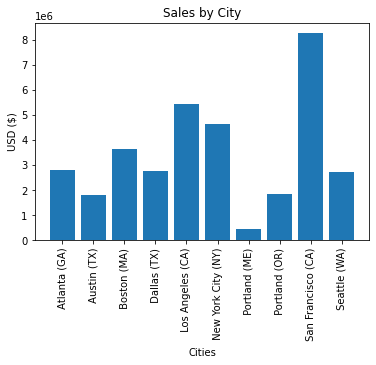

In [25]:
cities = [city for city, salesbycity in df.groupby('Cities')]
plt.bar(cities, salesbycity['Sales'])
plt.title('Sales by City')
plt.xlabel('Cities')
plt.ylabel('USD ($)')
plt.xticks(rotation='vertical', size = 10)
plt.show()

# What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [10]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Cities,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),9


In [11]:
countorder = df.groupby('Hour').count()
countorder

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,Month,Cities
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


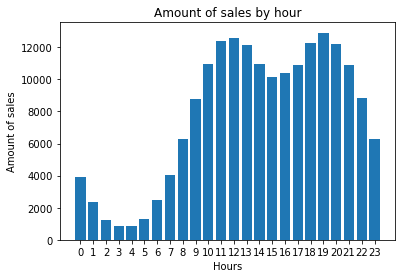

In [28]:
hours = [hour for hour, countorder in df.groupby('Hour')]

plt.bar(hours, countorder['Order ID'])
plt.title('Amount of sales by hour')
plt.xlabel('Hours')
plt.ylabel('Amount of sales')
plt.xticks(hours)
plt.show()

# What products are most often sold together?

In [13]:
df1 = df[df['Order ID'].duplicated(keep = False)]
df1 = df1[['Order ID', 'Product']]
df1.head()

,Order ID,Product
3,176560,Google Phone
4,176560,Wired Headphones
18,176574,Google Phone
19,176574,USB-C Charging Cable
30,176585,Bose SoundSport Headphones


In [14]:
df1['Group'] = df1.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df1.head()

,Order ID,Product,Group
3,176560,Google Phone,"Google Phone, Wired Headphones"
4,176560,Wired Headphones,"Google Phone, Wired Headphones"
18,176574,Google Phone,"Google Phone, USB-C Charging Cable"
19,176574,USB-C Charging Cable,"Google Phone, USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,"Bose SoundSport Headphones, Bose SoundSport He..."


In [15]:
df1 = df1[['Order ID', 'Group']].drop_duplicates()
df1

,Order ID,Group
3,176560,"Google Phone, Wired Headphones"
18,176574,"Google Phone, USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
32,176586,"AAA Batteries (4-pack), Google Phone"
119,176672,"Lightning Charging Cable, USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones, Apple Airpods Headph..."
11619,259297,"iPhone, Lightning Charging Cable, Lightning Ch..."
11627,259303,"34in Ultrawide Monitor, AA Batteries (4-pack)"
11639,259314,"Wired Headphones, AAA Batteries (4-pack)"


In [16]:
from itertools import combinations
from collections import Counter

count = Counter()

for sublist in df1['Group']:
    b = sublist.split(', ')
    count.update(Counter(combinations(b, 2)))

for key, value in count.most_common(10):
    print (key, ': ', value)

('iPhone', 'Lightning Charging Cable') :  1005
('Google Phone', 'USB-C Charging Cable') :  987
('iPhone', 'Wired Headphones') :  447
('Google Phone', 'Wired Headphones') :  414
('Vareebadd Phone', 'USB-C Charging Cable') :  361
('iPhone', 'Apple Airpods Headphones') :  360
('Google Phone', 'Bose SoundSport Headphones') :  220
('USB-C Charging Cable', 'Wired Headphones') :  160
('Vareebadd Phone', 'Wired Headphones') :  143
('Lightning Charging Cable', 'Wired Headphones') :  92


# What product sold the most? Why do you think it sold the most?

In [17]:
salebyproduct = df.groupby('Product').sum()
salebyproduct

,Quantity Ordered,Price Each,Sales,Month,Hour
Product,,,,,
20in Monitor,4129,451068.99,454148.71,29336,58764
27in 4K Gaming Monitor,6244,2429637.70,2435097.56,44440,90916
27in FHD Monitor,7550,1125974.93,1132424.50,52558,107540
34in Ultrawide Monitor,6199,2348718.19,2355558.01,43304,89076
AA Batteries (4-pack),27635,79015.68,106118.40,145558,298342
AAA Batteries (4-pack),31017,61716.59,92740.83,146370,297332
Apple Airpods Headphones,15661,2332350.00,2349150.00,109477,223304
Bose SoundSport Headphones,13457,1332366.75,1345565.43,94113,192445
Flatscreen TV,4819,1440000.00,1445700.00,34224,68815


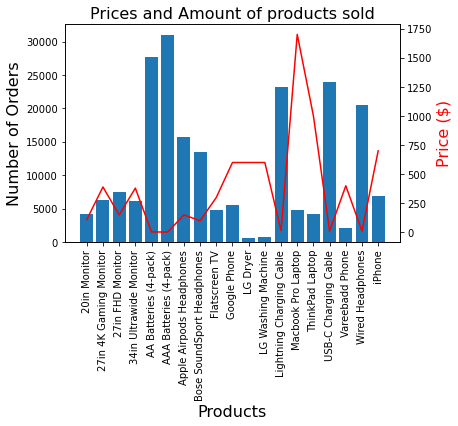

In [31]:
products = [product for product, salebyproduct in df.groupby('Product')]
price = df.groupby('Product').mean()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products, salebyproduct['Quantity Ordered'])
ax2.plot(products, price['Price Each'], 'r')
plt.title("Prices and Amount of products sold" , size = 16)
ax1.set_xticklabels(products, rotation = 'vertical')
ax1.set_xlabel('Products', fontsize=16)
ax2.set_ylabel('Price ($)', fontsize=16, color = 'r')
ax1.set_ylabel('Number of Orders', fontsize=16)
plt.show()